In [5]:
# instalación de opencv y skeleton
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python && easy_install skeleton && pip install skeleton
import cv2
from skimage.morphology import skeletonize,skeletonize_3d

import matplotlib.pyplot as plt 
from skimage.io import imread, imshow
import numpy as np
from PIL import Image
from skimage.filters import threshold_otsu
from skimage import io,color,util




Searching for skeleton
Reading https://pypi.python.org/simple/skeleton/
Best match: skeleton 0.6
Processing skeleton-0.6.tar.gz
Writing /tmp/easy_install-TPouBq/skeleton-0.6/setup.cfg
Running skeleton-0.6/setup.py -q bdist_egg --dist-dir /tmp/easy_install-TPouBq/skeleton-0.6/egg-dist-tmp-VU9zdD
Traceback (most recent call last):
  File "/usr/bin/easy_install", line 11, in <module>
    load_entry_point('setuptools==36.2.7', 'console_scripts', 'easy_install')()
  File "/usr/lib/python2.7/dist-packages/setuptools/command/easy_install.py", line 2334, in main
    **kw
  File "/usr/lib/python2.7/distutils/core.py", line 151, in setup
    dist.run_commands()
  File "/usr/lib/python2.7/distutils/dist.py", line 953, in run_commands
    self.run_command(cmd)
  File "/usr/lib/python2.7/distutils/dist.py", line 972, in run_command
    cmd_obj.run()
  File "/usr/lib/python2.7/dist-packages/setuptools/command/easy_install.py", line 436, in run
    self.easy_install(spec, not self.no_deps)
  File "/u

In [4]:
from google.colab import files
uploaded=files.upload()

In [5]:
ls


datalab/


In [0]:
#Función que descarga un archivo de internet
def descargar_zip_url(url):
  from urllib import request
  import zipfile

  # Nombre del archivo a partir del URL
  zipname = url[url.rfind("/") + 1:]
  while not zipname:
    zipname = raw_input("No se ha podido obtener el nombre del ""archivo.\nEspecifique uno: ")

  print("Descargando..." ,zipname)

  # Archivo local
  z = open(zipname, "wb")

  # Escribir en un nuevo fichero local los datos obtenidos via HTTP.
  z.write(request.urlopen(url).read())

  # Cerrar ambos
  z.close()

  print ("Descargado correctamente.",zipname)

  print (zipname, zipfile.is_zipfile(zipname))
  return zipname

In [0]:
# abre y extrae todos los ficheros en un zip  
def extraer_zip(zipname):
  import zipfile
  password = None
  z = zipfile.ZipFile(zipname, "r")
  try:
      z.extractall(pwd=password)
      for file in z.namelist():
        print(z.getinfo(file))
        imshow(file)
  except:
      print('Error')
      pass
  z.close()

In [9]:
zipname=descargar_zip_url("https://github.com/apj0007/PrawnView/raw/master/docs/img/ind_internet.zip")

Descargando... ind_internet.zip
Descargado correctamente. ind_internet.zip
ind_internet.zip True


<ZipInfo filename='2_1.png' compress_type=deflate external_attr=0x20 file_size=22536 compress_size=22327>
<ZipInfo filename='1.jpg' compress_type=deflate external_attr=0x20 file_size=377913 compress_size=360685>


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


<ZipInfo filename='1_1.jpg' compress_type=deflate external_attr=0x20 file_size=9772 compress_size=9580>
<ZipInfo filename='1_2.jpg' compress_type=deflate external_attr=0x20 file_size=4459 compress_size=4135>
<ZipInfo filename='1_3.jpg' compress_type=deflate external_attr=0x20 file_size=51313 compress_size=46719>
<ZipInfo filename='1_4.jpg' compress_type=deflate external_attr=0x20 file_size=21374 compress_size=19920>


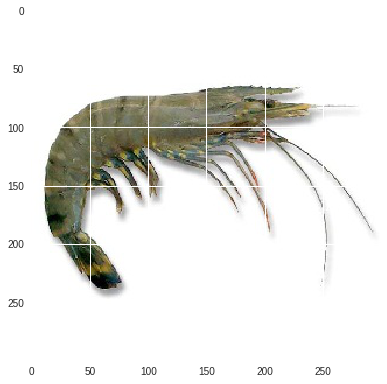

In [10]:
extraer_zip(zipname)

In [11]:
!ls


1_1.jpg  1_2.jpg  1_3.jpg  1_4.jpg  1.jpg  2_1.png  datalab  ind_internet.zip


Montar google drive como disco duro¿?¿?¿?
cARGAR IMAGENES en un zip(dropbox-github)
mirar eskeleton


In [0]:
#@title Default title text
from urllib import request

# cargando la imagen del articulo desde internet
url = "https://ars.els-cdn.com/content/image/1-s2.0-S0260877416303521-gr1_lrg.jpg"
path = "gambas.jpg"



f = open(path, 'wb')
f.write(request.urlopen(url).read())
f.close()

In [13]:
!ls

1_1.jpg  1_3.jpg  1.jpg    datalab     ind_internet.zip
1_2.jpg  1_4.jpg  2_1.png  gambas.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


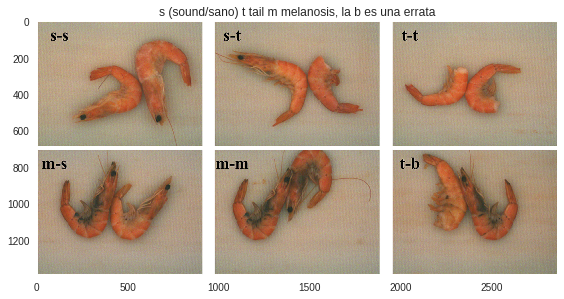

In [14]:
import matplotlib.pyplot as plt 
from skimage.io import imread, imshow

img = imread(path)

imshow(img)
plt.title('s (sound/sano) t tail m melanosis, la b es una errata')
plt.grid(False)
plt.show() 




In [15]:
!ls

1_1.jpg  1_3.jpg  1.jpg    datalab     ind_internet.zip
1_2.jpg  1_4.jpg  2_1.png  gambas.jpg


Voy a empezar a probar los algoritmos del artículo.

Se hace extracción de características para clasificar la gamba en:
- sano
- cola
- melanosis
- desconocido


Esto se usa para clasificar como correctas o incorrectas las segmentaciones. 
Si un elemento se divide en dos partes y las dos partes pertenecen a los grupos conocidos la segmentación es buena, en caso contrario es erronea.

Características:
- Área. Puede facilmente diferenciar entre sano y cola
- Característica del ojo. En algunos casos el área de una cola puede ser similar al área de un sano pequeño. En estos casos se puede usar el ojo para discriminar. Esto se hace en 3 pasos:
  - Obtención del contorno y del esqueleto de la gamba. El esqueleto es el resultado de la operación de esqueletización.
  - Calcular el "área blanca" que curiosamente es negra ??. Una vez pasada a escala de grises, serían las zonas de la gamba con una intensidad menor de 50. Una vez eliminado el ruido.
  - Identificación del ojo dentro del "área blanca". El ojo está muy cercano al punto final del esqueleto. Se pueden obtener los centroides de las regiones de la zona blanca y obtener sus distancias euclideas con respecto a los puntos finales del esqueleto. La región con menor distancia euclidea será el ojo.
  
- Area Ratio: Ni el área, ni la presencia de ojo discrimina entre sanas y melanoticas. Quitando el ojo del "área blanca" tenemos el área de melanosis. $\text{area ratio} =\dfrac{\text{area melanosis}}{\text{area total}}$


Estas 3 características pueden discriminar los tipos de gamba de los fragmentos después de una segmentación.

In [16]:
# hacer ejemplo de selección con máscara

'''
Hacer selección con máscara significa que si tenemos un array de booleanos (por ejemplo el resultante de binarizar una imagen)
ponemos obtener una imagen en la que se seleccionen los pixels en los que en la mascara tenemos True y el resto de pixels se dejan a negro o blanco


'''

# primero el ejemplo de la documentación de binarización
from skimage import data
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow

import matplotlib.pyplot as plt


image = data.camera()

img=leer_mostrar_imagen('4.JPG')
#image=imagen_2D(img)

thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')


ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

plt.show()




FileNotFoundError: ignored

In [13]:
# Vemos que binary (la imagen en blanco y negro) es una mascara
binary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [0]:
# Ejemplo de como funciona la selección usando máscara
import numpy as np

a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.array([False,False,False,False,False,True,True,True,True,True])

c = a.copy()
c[~b] = 0
c

array([ 0,  0,  0,  0,  0,  6,  7,  8,  9, 10])

In [0]:
# ejemplo que invierte la selección

c = a.copy()
c[b] = 0
c

array([1, 2, 3, 4, 5, 0, 0, 0, 0, 0])

In [0]:
# previamente a usar este ejemplo con una imagen hay que "aplanarla"
image.flatten()[binary.flatten()]

array([156, 157, 160, ..., 121, 113, 111], dtype=uint8)

In [0]:
# flatten aplana (pasa todo a una linea) y reshape lo pone como se quiera
a = np.array([1,2,3,4,5,6,7,8,9,10])
a.reshape((5,2))

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

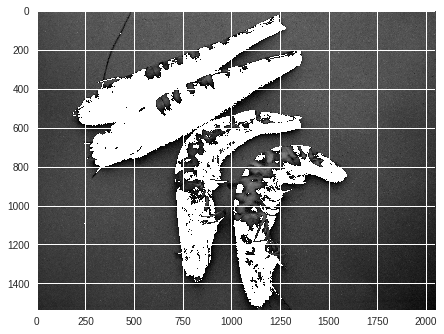

In [67]:
# Ejemplos de selección con mascara

import numpy as np


img_mask = image.flatten() #Aplana la imagen
img_mask[~binary.flatten()] = 255  #conversion de los FALSE de la imagen binaria en blanco(255)

img_mask= img_mask.reshape(image.shape) #colocación del array de línea a matriz



plt.imshow(img_mask, cmap=plt.cm.gray)

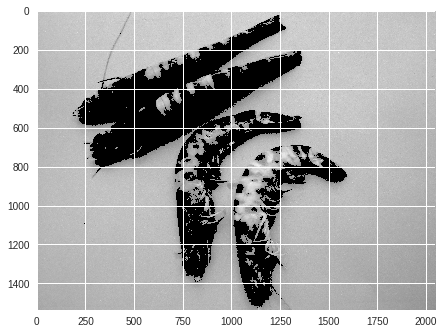

In [68]:
#Lo mismo que en la celda anterior pero convirtiendo el hombre a negro

img_mask = image.flatten()
img_mask[~binary.flatten()] = 0

img_mask= img_mask.reshape(image.shape)



plt.imshow(img_mask, cmap=plt.cm.gray)

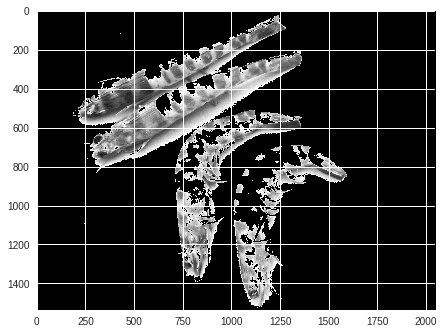

In [69]:
#Conversion del fondo a negro

img_mask = image.flatten()
img_mask[binary.flatten()] = 0

img_mask= img_mask.reshape(image.shape)



plt.imshow(img_mask, cmap=plt.cm.gray)

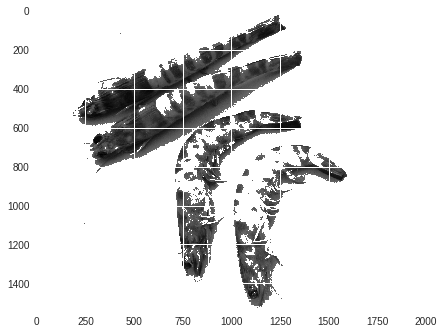

In [70]:
#Conversión del fondo a blanco

img_mask = image.flatten()
img_mask[binary.flatten()] = 255

img_mask= img_mask.reshape(image.shape)



plt.imshow(img_mask, cmap=plt.cm.gray)

Segmentación:

Algoritmo basado en watershed. Probaremos la implementación de skimage y de opencv a ver cual va mejor.


Watershed sobre-segmenta, esto es que da más segmentos de las gambas reales que están presentes en la imagen.
Para evitar esta sobre-segmentación cada una de las particiones posibles se evalua con el clasificador y si el clasificador dice que las dos partes son correctas es buena.

TODO: Improved pruning algoritm

In [0]:
# Empecemos a obtener características de cada imagen
'''
area, ojo, area ratio

http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

'''
# imports necesarios para hacer el análisis de componentes conexas
from skimage.measure import label
from skimage.measure import regionprops,find_contours

#Modulo para sacar los contornos que nos puede ser de utilidad posteriormente
fc=find_contours(img_mask, 0.5)
plt.imshow(img_mask, cmap=plt.cm.gray)

for region in regionprops(img_mask):
  print("____________________________________INICIO REGIONPROPS__________________________________")
  print("Área:",region.area) #Número de pixels de la region
  print("Eccentricity:",region.eccentricity)#Excentricidad de la elipse que tiene los mismos segundos segundos que la región. 
            #La excentricidad es la relación de la distancia focal (distancia entre los puntos focales)sobre la longitud del eje principal.
            #El valor está en el intervalo [0, 1). Cuando es 0, la elipse se convierte en un círculo
  print("Extent :",region.extent ) #Proporción de píxeles en la región a píxeles en el cuadro delimitador total. Calculado como área / (rows * cols)
  print("Solidity:",region.solidity) #Proporción de píxeles en la región a píxeles de la imagen del casco convexo
  



In [0]:
#Segmentacion de la imagen con el algoritmo watershed

from skimage.color import rgb2gray, rgb2grey

 



In [235]:
zipname=descargar_zip_url("https://github.com/apj0007/PrawnView/raw/master/docs/img/FOTOS%20TALLAS.zip")

Descargando... FOTOS%20TALLAS.zip
Descargado correctamente. FOTOS%20TALLAS.zip
FOTOS%20TALLAS.zip True


<ZipInfo filename='8.1.JPG' compress_type=deflate external_attr=0x20 file_size=957790 compress_size=947105>


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


<ZipInfo filename='8.3.JPG' compress_type=deflate external_attr=0x20 file_size=957228 compress_size=946882>
<ZipInfo filename='8.4.JPG' compress_type=deflate external_attr=0x20 file_size=991028 compress_size=981002>
<ZipInfo filename='8.7 - copia.JPG' compress_type=deflate external_attr=0x20 file_size=881596 compress_size=869887>
<ZipInfo filename='8.7.JPG' compress_type=deflate external_attr=0x20 file_size=881596 compress_size=869887>
<ZipInfo filename='8.8.jpg' compress_type=deflate external_attr=0x20 file_size=463365 compress_size=461399>
<ZipInfo filename='8.JPG' compress_type=deflate external_attr=0x20 file_size=963430 compress_size=952938>
<ZipInfo filename='10.1.JPG' compress_type=deflate external_attr=0x20 file_size=1190402 compress_size=1180259>
<ZipInfo filename='10.JPG' compress_type=deflate external_attr=0x20 file_size=1270303 compress_size=1269468>
<ZipInfo filename='4.1.JPG' compress_type=deflate external_attr=0x20 file_size=1229320 compress_size=1219333>
<ZipInfo filenam

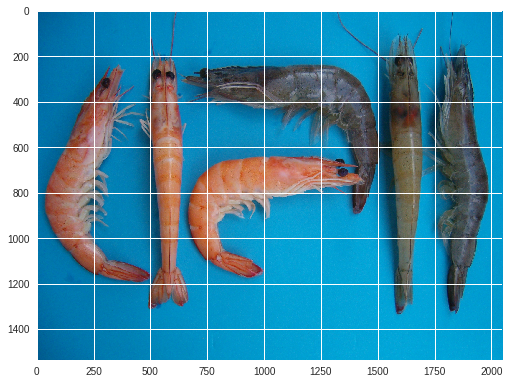

In [236]:
extraer_zip(zipname)

In [10]:
ls

datalab/    M_12.1.jpg  M_1.9.jpg  M_6.jpg    M_8.jpg
M_10_1.jpg  M_12.jpg    M_22.jpg   M_8.1.jpg  M_9.1.jpg
M_10.jpg    M_13.JPG    M_4.1.jpg  M_8.2.jpg  M_9.jpg
M_1.11.jpg  M_1.8.jpg   M_6.1.jpg  M_8.3.jpg  Melanosis.zip


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


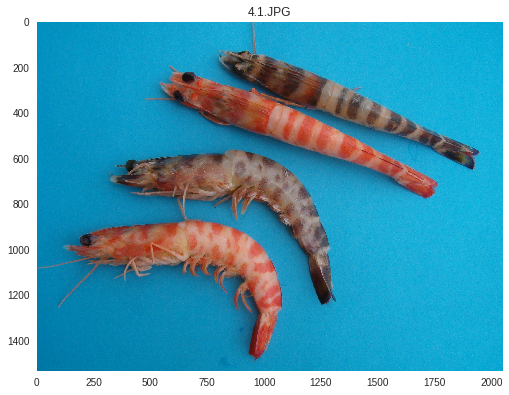

In [18]:
imge=leer_mostrar_imagen('4.1.JPG')

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


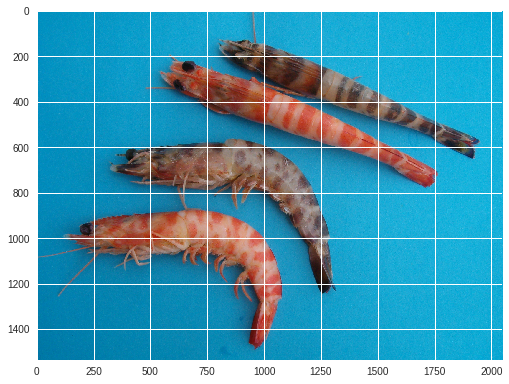

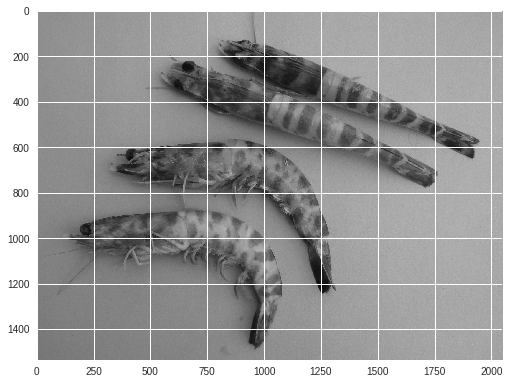

In [21]:
img2d=escaladegrises(imge)



/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


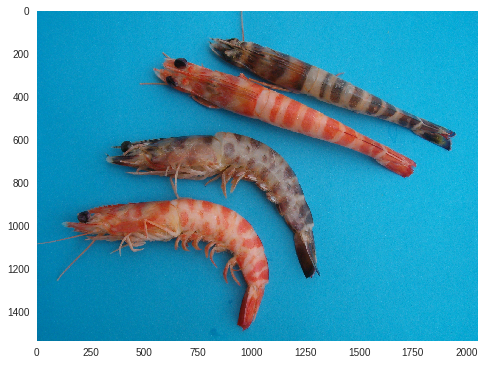

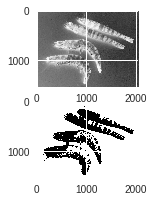

In [81]:
def segmentacion(imagen,debug=False):
  
  img = imagen.copy()
  
  fig = plt.figure(figsize=(20,20))

    
  
  if debug:
    plt.subplot(4, 1, 1)
    plt.imshow(img)
    
    
    
    

      


  #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  #gray = rgb2grey(img)
  gray=imagen_2D(img)
  if debug:
    plt.subplot(4, 1, 2)
    plt.imshow(gray,cmap='gray')

  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  if debug:
    plt.subplot(4, 1, 3)
    plt.imshow(thresh)
    
  # noise removal
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
  

  # sure background area
  sure_bg = cv2.dilate(opening,kernel,iterations=3)
  
  

  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)
  #plt.imshow(sure_bg)

  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0
  

  markers = cv2.watershed(img,markers)
  img[markers == -1] = [255,0,0]
  
  return markers

markers=segmentacion(imge,debug=True)

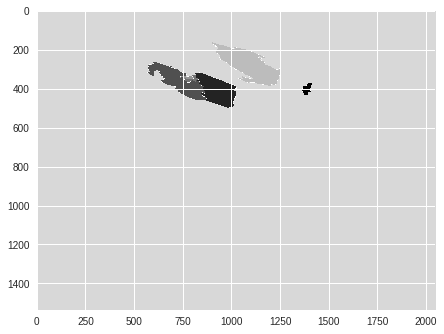

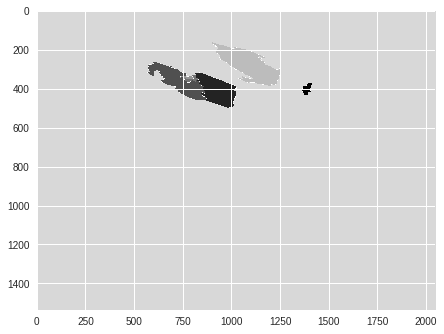

In [63]:
plt.imshow(markers)
plt.figure()
plt.imshow(markers)

In [20]:
np.unique(markers)

array([-1,  1,  2,  3,  4], dtype=int32)

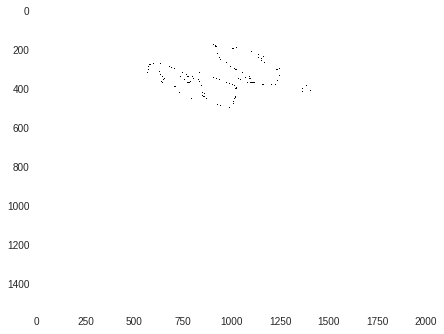

In [54]:
plt.imshow(markers==-1)


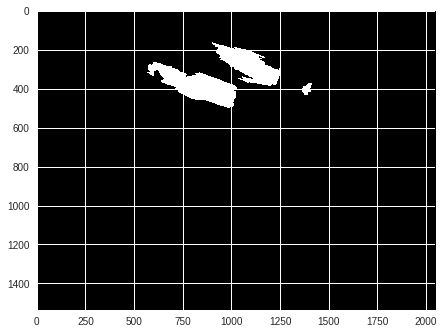

In [55]:
plt.imshow(markers==1)


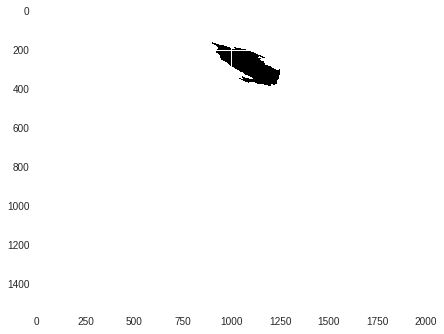

In [56]:
plt.imshow(markers==2)


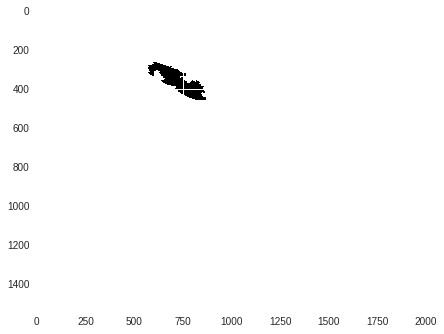

In [57]:
plt.imshow(markers==5)


______________________________________________________________________________________________________________________________________________________________________________________________

- probar a importar desde github (solo probar, sino te sale me escribes https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab)

- hacer funciones individuales:
  - escalaGrises
  - binarizar
  - ...
  
  Probar con skimage y opencv y quedarnos con la mas sencilla  

- hacer pruebas de skeleton con las imagenes de prueba de skimage, para ver si tiene que ser negro sobre blanco o blanco sobre negro (implementar si hace falta una función de invertir)

- binarizar bien la imagen para poder llevarla a skeleton
- probar skeleton con cv2 y con scikit
- comprobar markers



In [237]:
!ls

10.1.JPG  1_4.jpg  4.JPG    8.1.JPG	     8.8.jpg
10.JPG	  1.jpg    6.2.JPG  8.3.JPG	     8.JPG
1_1.jpg   2_1.png  6.3.JPG  8.4.JPG	     datalab
1_2.jpg   4.1.JPG  6.4.JPG  8.7 - copia.JPG  FOTOS%20TALLAS.zip
1_3.jpg   4.2.JPG  6.7.JPG  8.7.JPG	     ind_internet.zip


In [0]:
def leer_mostrar_imagen(file):

  img =imread(file)
  plt.subplot(211)
  io.imshow(img)
  return img

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


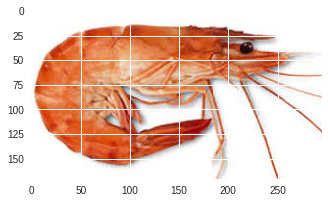

In [248]:
imge=leer_mostrar_imagen('1_1.jpg')

In [0]:
def escaladegrises1(img):
  img_gris = color.rgb2gray(img)
  plt.subplot(211)
  io.imshow(img)
  plt.subplot(212)
  io.imshow(img_gris)
  io.show()
  return img_gris

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


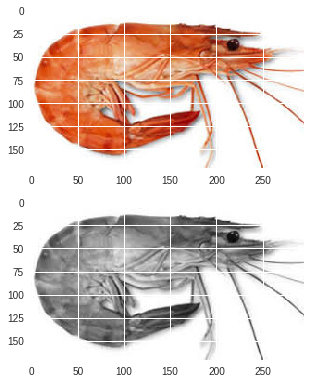

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [249]:
grey1=escaladegrises1(imge)# lo devuelve en 1 y 0
grey1

In [0]:
def escaladegrises2(img):
  img2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Imagen en 2D escala de grises para trabajar con ella
  plt.subplot(211)
  io.imshow(img)
  plt.subplot(212)
  io.imshow(img2)
  io.show()

  return img2

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


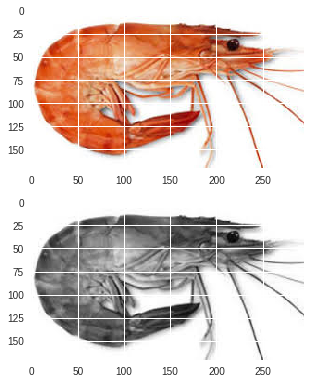

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [250]:
grey2=escaladegrises2(imge)
grey2

In [0]:
def binarizar1(grey):
  thresh = threshold_otsu(grey)
  binary = grey > thresh
  plt.subplot(211)
  io.imshow(grey)
  plt.subplot(212)
  io.imshow(binary)
  io.show()

  
  return binary

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


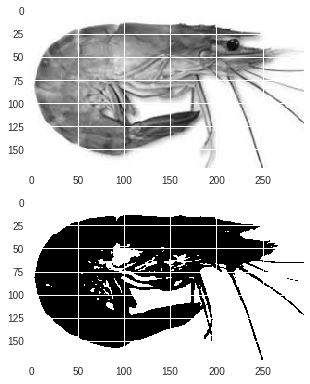

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [251]:
binary1=binarizar1(grey1)
binary1

In [0]:
def binarizar2(grey):
  ret,binary = cv2.threshold(grey,240,255,cv2.THRESH_BINARY)
  plt.subplot(211)
  io.imshow(grey)
  plt.subplot(212)
  io.imshow(binary)
  io.show()
  return binary

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


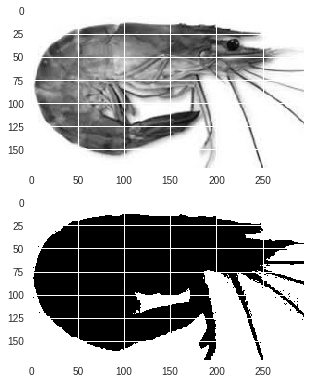

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [316]:
binary2=binarizar2(grey2)
binary2


In [318]:
binary2

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [0]:
def invertirbinarizar1(binary):
  inbin = util.invert(binary)
  plt.subplot(211)
  io.imshow(binary)
  plt.subplot(212)
  io.imshow(inbin)
  io.show()
  return inbin

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


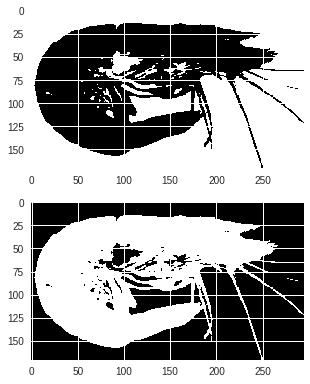

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [267]:
inbin1=invertirbinarizar1(binary1)
inbin1

In [0]:
def invertirbinarizar2(binary):
  ret,thresh2 = cv2.threshold(binary2,190,255,cv2.THRESH_BINARY_INV)
  plt.subplot(211)
  io.imshow(binary)
  plt.subplot(212)
  io.imshow(thresh2)
  io.show()
  return thresh2

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


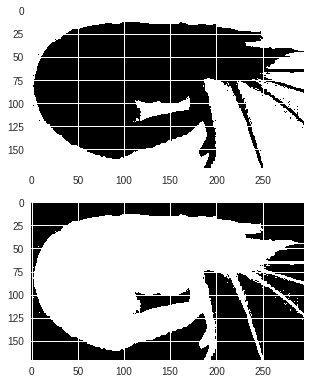

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [301]:
inbin2=invertirbinarizar2(binary2)
inbin2

In [303]:
inbin2


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
def skeleton1(data):
  from skimage.data import binary_blobs
  #data = invert(datra)
  #data = binary_blobs(200, blob_size_fraction=.2, volume_fraction=.35, seed=1)

  skeleton3d = skeletonize_3d(data)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

  ax = axes.ravel()

  ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
  ax[0].set_title('original')
  ax[0].axis('off')

  ax[1].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
  ax[1].set_title('skeletonize_3d')
  ax[1].axis('off')

  fig.tight_layout()
  plt.show()
  return skeleton


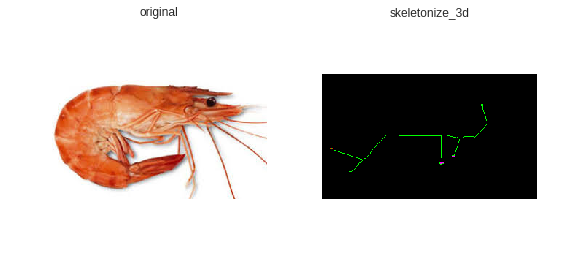

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [278]:
skeleton1(imge)

In [0]:

def skeleton2(bin):
  from skimage import data
  from skimage.util import invert
  
  # Invert the horse image
  image = invert(bin)
  
  # perform skeletonization
  skeleton = skeletonize(image)

  # display results
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

  ax = axes.ravel()

  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].axis('off')
  ax[0].set_title('original', fontsize=20)

  ax[1].imshow(skeleton, cmap=plt.cm.gray)
  ax[1].axis('off')
  ax[1].set_title('skeleton', fontsize=20)
  data.horse()
  fig.tight_layout()
  plt.show()


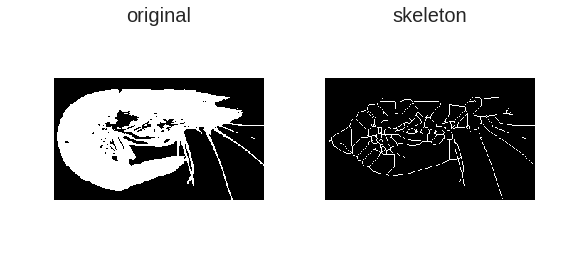

In [319]:
skeleton2(binary1)


In [299]:
  from skimage import data
  import matplotlib.pyplot as plt
  from skimage.util import invert
  
  # Invert the horse image
  image =invert(data.horse())
  image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Enviar a skeleton una imagen binaria de True y **False**